In [1]:
import geopandas as gpd
import pandas as pd

ERROR 1: PROJ: proj_create_from_database: Open of /home/linusrg/Code/LILI/.micromamba/envs/LILI-Env/share/proj failed


In [2]:
df = pd.read_csv('inno_geocoded.csv')
df = df.dropna(subset=['lng', 'lat'])
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lng, df.lat), crs=4326)
gdf['created_at'] = pd.to_datetime(df['created_at'])

/tmp/ipykernel_11201/2656640183.py:1: DtypeWarning: Columns (53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('inno_geocoded.csv')


In [3]:
innovation = 'inno_01'
innos = gdf[gdf['inno_nr'] == innovation]
len(innos)

322

In [4]:
innos.lat

295      15.687101
310      23.658512
315      23.658512
320      39.491522
325      10.237514
           ...    
18882     4.099917
19385    41.433188
19387    37.992379
19400    39.326068
19895    10.237514
Name: lat, Length: 322, dtype: float64

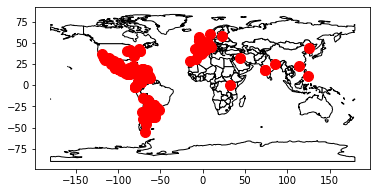

In [5]:
import matplotlib.pyplot as plt
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots()
ax.set_aspect('equal')
world.plot(ax=ax, color='white', edgecolor='black')

#innos.plot(ax=ax, marker='o', color='red', markersize=5)
plt.scatter(x = innos.lng, y = innos.lat, c='red', s=100)

<AxesSubplot:>

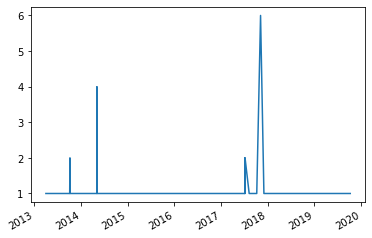

In [6]:
innos['created_at'].value_counts().plot()

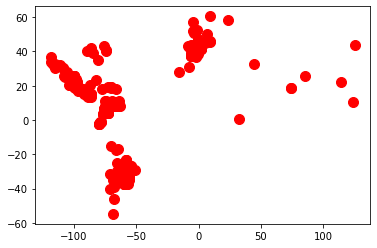

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera
from IPython.display import HTML

numpoints = 10
points = np.random.random((2, numpoints))

colors = cm.rainbow(np.linspace(0, 1, numpoints))

camera = Camera(plt.figure())

for _ in range(100):
    #points += 0.1 * (np.random.random((2, numpoints)) - .5)
    #plt.scatter(*points, c='red', s=100)
    plt.scatter(x = innos.lng, y = innos.lat, c='red', s=100)
    camera.snap()

anim = camera.animate()
HTML(anim.to_html5_video())
#anim.save('scatter.mp4')

In [8]:
https://stackoverflow.com/questions/9401658/how-to-animate-a-scatter-plot

SyntaxError: invalid syntax (1181818253.py, line 1)

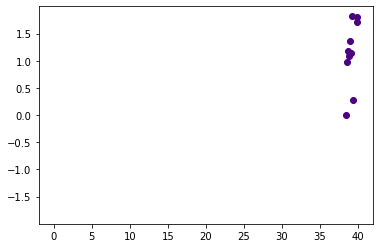

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

np.random.seed(42)
frames = 40

x = np.arange(frames)
y = np.sin(x)
colors = itertools.cycle(['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])
data = [(np.random.uniform(-1, 1, 10) + x[i],
         np.random.uniform(-1, 1, 10) + y[i])
        for i in range(frames)]

fig, ax = plt.subplots()

def update(i):
    ax.clear()
    ax.scatter(data[i][0], data[i][1], c=next(colors))
    ax.set_xlim(-2, frames+2)
    ax.set_ylim(min(y) - 1, max(y) + 1)

ani = animation.FuncAnimation(fig, update, frames=frames, interval=100)
HTML(ani.to_html5_video())